### Quick test to check whether if random sized samples affect differences in the clustering
We compute a random clustering, and check if our tests find significant things in comparing more and more smaller partitions of the data.

Need to delve more into this. Need to link more resources and possible things to take into account.

In [2]:
from scipy.stats import norm, ttest_ind, f_oneway, mannwhitneyu
import numpy as np
# Create a normal distribution
n = 10000
n_it = 100
# Different sizes of clusters
pvalues = np.zeros((2, 100))
div_size = np.linspace(1,0.001,num=100)
i = 0
r1 = norm.rvs(size=int(n))
r2 = norm.rvs(size=int(n))
for d in div_size:
    pvalues_1 = []
    pvalues_2 = []
    for it in range(n_it):
        # Select a smaller, random subset of r1.
        rs1 = np.random.choice(r1, int(n*d), replace=False)
        # t-test
        s1, p1 = ttest_ind(rs1, r2)
        pvalues_1.append(p1)
        
        # Test wilcoxon test
        s2, p2 = mannwhitneyu(rs1, r2, alternative = "two-sided")
        pvalues_2.append(p2)

    pvalues[0,i] = np.mean(pvalues_1)
    pvalues[1,i] = np.mean(pvalues_2)
    i = i + 1


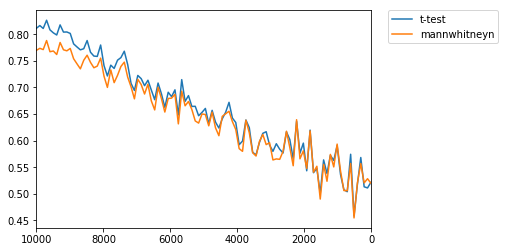

In [3]:
# Draw figure
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(div_size*10000, pvalues[0], label='t-test')
plt.plot(div_size*10000, pvalues[1], label='mannwhitneyn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(10000, 0)  # decreasing time
plt.savefig("sample_size_test.png")
plt.show()